Machine Learning Models
===============================================
Participatory Breeding Paper
-----------------------
**Christopher Mujjabi**


First, we import these packages and modules that will help us with reading our datasets and constructing visualizations. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import matplotlib.transforms as transforms

#### Importing the dataset and reassigning missing values

In [24]:
Data = pd.read_csv("Weather_Data_Stacked.csv")
print(Data)

         site  year month    prcp        srad       tmax       tmin  \
0       Adsit  2018   May  162.82  372.140645  74.555484  50.554516   
1       Adsit  2018   Jun  183.08  352.080333  76.914200  57.709400   
2       Adsit  2018   Jul   59.46  398.134839  82.159613  59.630581   
3       Adsit  2018   Aug  131.14  340.136774  81.326968  60.689097   
4       Adsit  2018   Sep  222.38  315.131000  74.063600  53.265800   
..        ...   ...   ...     ...         ...        ...        ...   
215  Zinniker  2019   May  176.41  360.190645  64.493484  43.957806   
216  Zinniker  2019   Jun  135.75  385.730333  75.620000  53.782400   
217  Zinniker  2019   Jul   98.71  376.202903  84.093161  62.595935   
218  Zinniker  2019   Aug  100.26  364.968710  78.509097  56.369677   
219  Zinniker  2019   Sep  218.92  287.288000  74.447600  56.092400   

          temp      GDD  
0    62.555000  383.319  
1    67.311800  508.788  
2    70.895097  640.179  
3    71.008032  644.850  
4    63.664700  4

In [25]:
Data.describe()

,year,prcp,srad,tmax,tmin,temp,GDD
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2019.227273,124.381273,363.725273,78.952726,58.044203,68.498464,556.537541
std,0.952374,58.049268,28.793957,5.938784,5.851389,5.833371,173.269238
min,2018.000000,11.400000,277.836333,64.493484,43.286581,53.926613,123.777000
25%,2018.000000,84.097500,351.111167,75.363050,53.767284,64.725050,441.423000
50%,2019.000000,120.600000,366.952527,81.079613,59.198852,69.985952,605.790000
75%,2020.000000,155.040000,383.242532,83.553539,62.979597,73.110737,691.362000
max,2021.000000,351.810000,413.618000,87.312258,67.249226,77.280742,810.414000


####  Relationship between different weather variables


##### 1. Min and Max Temperature 

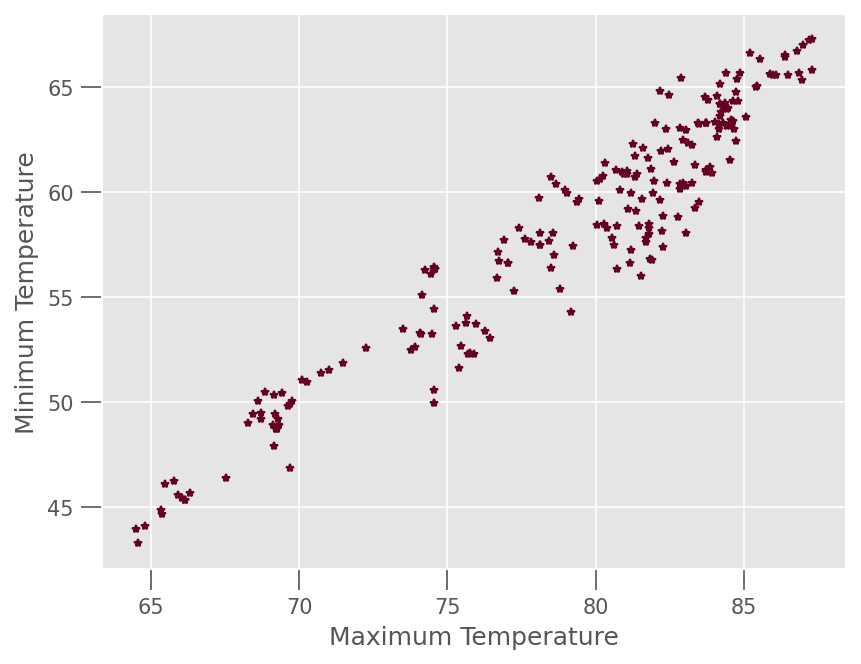

In [26]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(dpi=150)
    ax.plot(Data['tmax'], Data['tmin'],
            linestyle='', c='#650021', marker='*', markersize=4)
    ax.set_ylabel("Minimum Temperature")
    ax.set_xlabel("Maximum Temperature")
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    ax.tick_params(axis="both", which="major", labelsize=10, size=10)
plt.show()

##### 2. Temperature and Precipitation

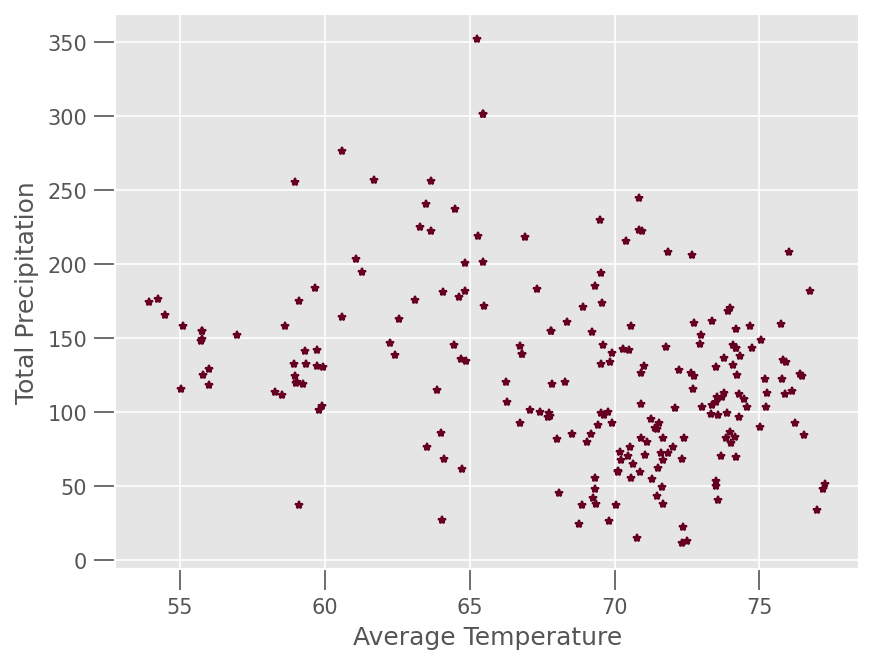

In [27]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(dpi=150)
    ax.plot(Data['temp'], Data['prcp'],
            linestyle='', c='#650021', marker='*', markersize=4)
    ax.set_ylabel("Total Precipitation")
    ax.set_xlabel("Average Temperature")
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    ax.tick_params(axis="both", which="major", labelsize=10, size=10)
    plt.show()

### Subset data by year

In [130]:
subset_2018 = Data[Data['year'] == 2018]
subset_2010 = Data[Data['year'] == 2019]
subset_2020 = Data[Data['year'] == 2020]
subset_2021 = Data[Data['year'] == 2021]

#### Precipitation

In [102]:
month_order = ['May', 'Jun', 'Jul', 'Aug', 'Sep']
pivot_df1 = subset_2018.pivot(
    index='month', columns='site', values='prcp').reindex(month_order)
custom_palette = ['cyan', 'dodgerblue', 'darkgoldenrod', 'darkred',
                  'olivedrab', 'red', 'navy', 'palevioletred', 'black', 'gray', 'coral', 'teal']

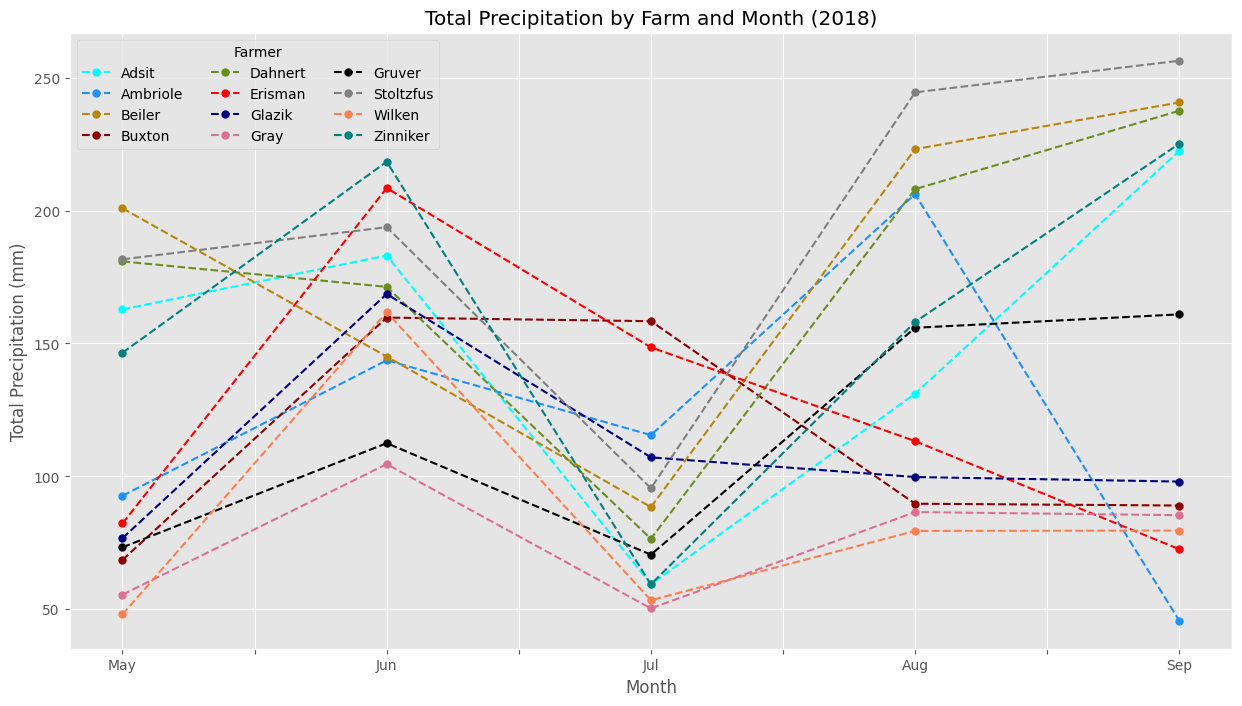

In [113]:
with plt.style.context("ggplot"):
    pivot_df1.plot(kind='line', linestyle='--', marker='o',
                   markersize=5, color=custom_palette, figsize=(15, 8))
    plt.xlabel('Month')
    plt.ylabel('Total Precipitation (mm)')
    plt.title('Total Precipitation by Farm and Month (2018)')
    plt.grid(True)
    plt.legend(title='Farmer', loc='upper left', ncol=3)
    plt.show()

#### Solar Radiation

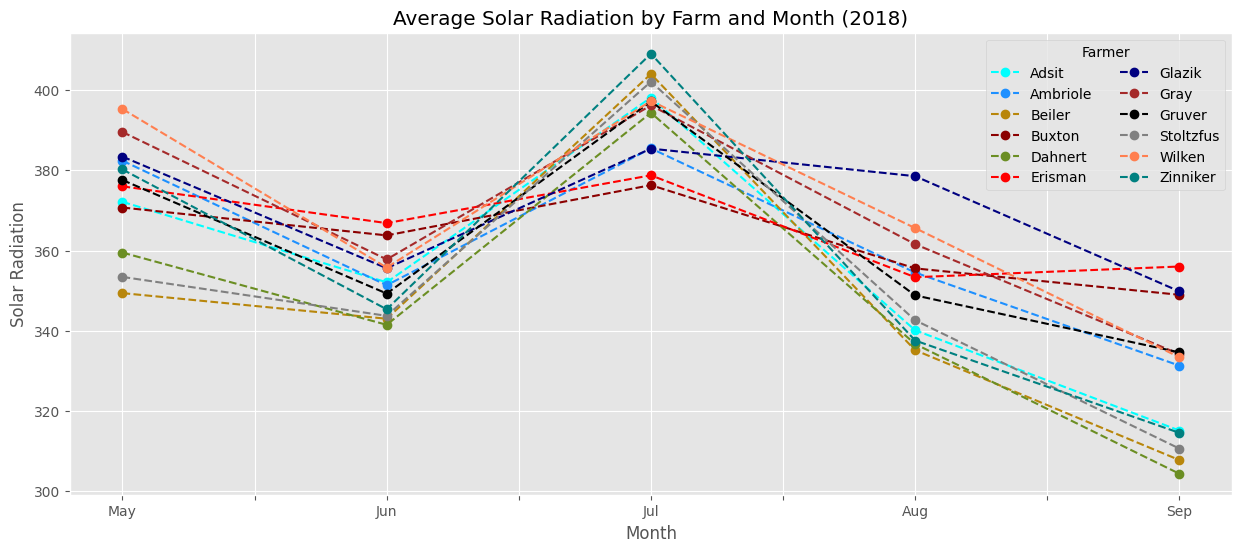

In [116]:
month_order = ['May', 'Jun', 'Jul', 'Aug', 'Sep']
Srad_df = subset_2018.pivot(
    index='month', columns='site', values='srad').reindex(month_order)
custom_palette = ['cyan', 'dodgerblue', 'darkgoldenrod', 'darkred',
                  'olivedrab', 'red', 'navy', 'brown', 'black', 'gray', 'coral', 'teal']
with plt.style.context("ggplot"):
    Srad_df.plot(kind='line', marker='o', linestyle='--',
                 color=custom_palette, figsize=(15, 6))
    plt.xlabel('Month')
    plt.ylabel('Solar Radiation')
    plt.title('Average Solar Radiation by Farm and Month (2018)')
    plt.grid(True)
    plt.legend(title='Farmer', loc='upper right', ncol=2)
    plt.show()

#### Average Temperature

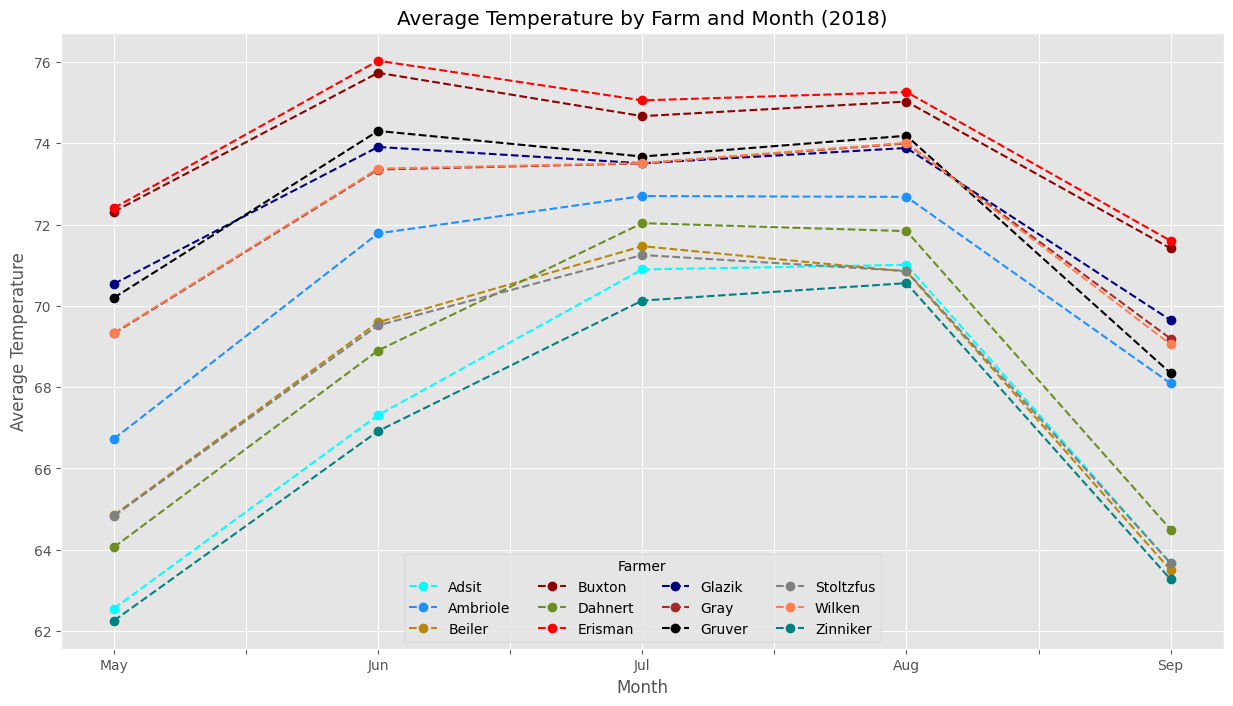

In [119]:
month_order = ['May', 'Jun', 'Jul', 'Aug', 'Sep']
Temp_df = subset_2018.pivot(
    index='month', columns='site', values='temp').reindex(month_order)
custom_palette = ['cyan', 'dodgerblue', 'darkgoldenrod', 'darkred',
                  'olivedrab', 'red', 'navy', 'brown', 'black', 'gray', 'coral', 'teal']
with plt.style.context("ggplot"):
    Temp_df.plot(kind='line', linestyle='--', marker='o',
                 color=custom_palette, figsize=(15, 8))
    plt.xlabel('Month')
    plt.ylabel('Average Temperature')
    plt.title('Average Temperature by Farm and Month (2018)')
    plt.grid(True)
    plt.legend(title='Farmer', loc='lower center', ncol=4)
    plt.show()

## Growing Degree 

Given that most of the farmrs plant at the end of may or begining of June. GDD was calculated from June 1 to Sept 30th. 

In [131]:
selected_months = ['Jun', 'Jul', 'Aug', 'Sep']
GDD = subset_2018[subset_2018['month'].isin(selected_months)]
GDD['cumulative_GDD'] = GDD.groupby('site')['GDD'].cumsum()

C:\Users\mujjabi2\AppData\Local\Temp\ipykernel_3252\1223704240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDD['cumulative_GDD'] = GDD.groupby('site')['GDD'].cumsum()


,site,year,month,prcp,srad,tmax,tmin,temp,GDD,cumulative_GDD
1,Adsit,2018,Jun,183.08,352.080333,76.914200,57.709400,67.311800,508.788,508.788
2,Adsit,2018,Jul,59.46,398.134839,82.159613,59.630581,70.895097,640.179,1148.967
3,Adsit,2018,Aug,131.14,340.136774,81.326968,60.689097,71.008032,644.850,1793.817
4,Adsit,2018,Sep,222.38,315.131000,74.063600,53.265800,63.664700,407.331,2201.148
11,Ambriole,2018,Jun,143.68,351.352000,81.267200,62.296400,71.781800,638.622,638.622
12,Ambriole,2018,Jul,115.54,385.461613,82.954516,62.445548,72.700032,688.140,1326.762
13,Ambriole,2018,Aug,206.17,354.518710,82.383161,62.976258,72.679710,696.591,2023.353
14,Ambriole,2018,Sep,45.72,331.311333,78.120800,58.060400,68.090600,528.156,2551.509
41,Beiler,2018,Jun,145.10,342.995000,78.492800,60.696800,69.594800,577.584,577.584
42,Beiler,2018,Jul,88.46,404.013226,81.869290,61.063613,71.466452,658.017,1235.601


,site,year,month,prcp,srad,tmax,tmin,temp,GDD,cumulative_GDD
1,Adsit,2018,Jun,183.08,352.080333,76.914200,57.709400,67.311800,508.788,892.107
2,Adsit,2018,Jul,59.46,398.134839,82.159613,59.630581,70.895097,640.179,1532.286
3,Adsit,2018,Aug,131.14,340.136774,81.326968,60.689097,71.008032,644.850,2177.136
4,Adsit,2018,Sep,222.38,315.131000,74.063600,53.265800,63.664700,407.331,2584.467
11,Ambriole,2018,Jun,143.68,351.352000,81.267200,62.296400,71.781800,638.622,1144.368
12,Ambriole,2018,Jul,115.54,385.461613,82.954516,62.445548,72.700032,688.140,1832.508
13,Ambriole,2018,Aug,206.17,354.518710,82.383161,62.976258,72.679710,696.591,2529.099
14,Ambriole,2018,Sep,45.72,331.311333,78.120800,58.060400,68.090600,528.156,3057.255
41,Beiler,2018,Jun,145.10,342.995000,78.492800,60.696800,69.594800,577.584,1027.845
42,Beiler,2018,Jul,88.46,404.013226,81.869290,61.063613,71.466452,658.017,1685.862


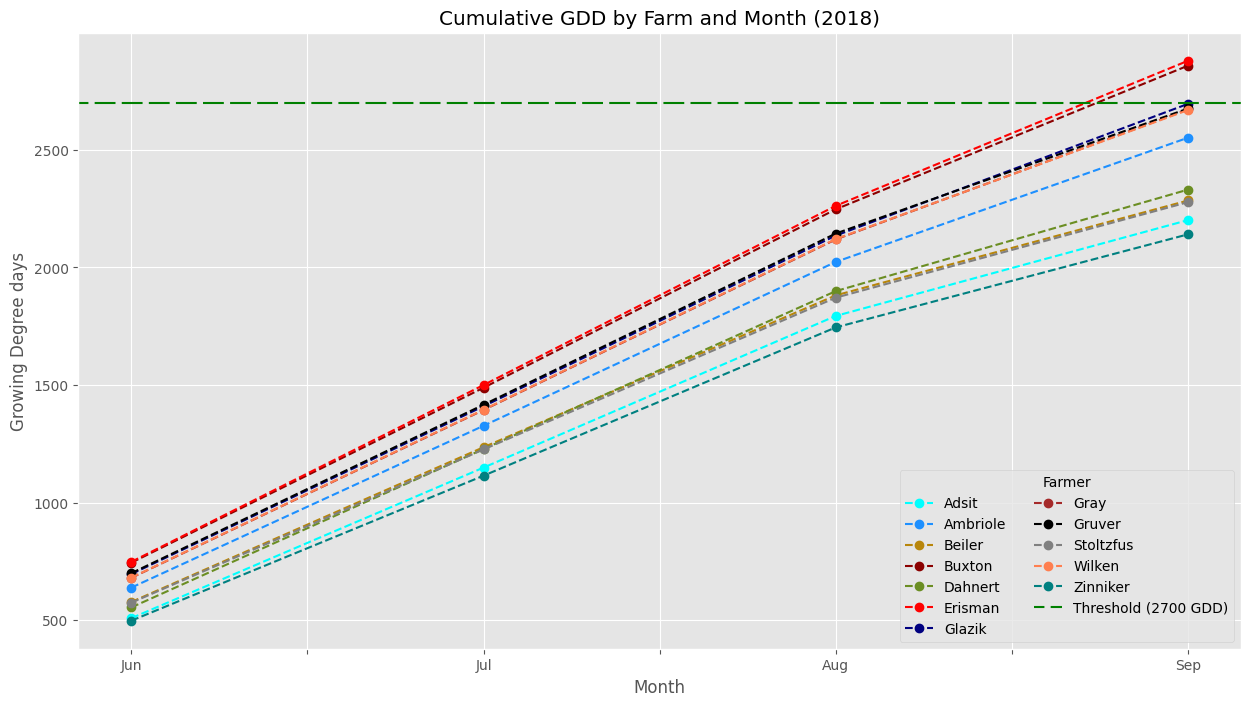

In [132]:
month_order = ['Jun', 'Jul', 'Aug', 'Sep']
Temp_df = GDD.pivot(
    index='month', columns='site', values='cumulative_GDD').reindex(month_order)
custom_palette = ['cyan', 'dodgerblue', 'darkgoldenrod', 'darkred',
                  'olivedrab', 'red', 'navy', 'brown', 'black', 'gray', 'coral', 'teal']
with plt.style.context("ggplot"):
    Temp_df.plot(kind='line', linestyle='--', marker='o',
                 color=custom_palette, figsize=(15, 8))
    plt.xlabel('Month')
    plt.ylabel('Growing Degree days')
    threshold_value = 2700
    plt.axhline(y=threshold_value, color='green', linestyle=(
        5, (10, 3)), label=f'Threshold ({threshold_value} GDD)')
    plt.title('Cumulative GDD by Farm and Month (2018)')
    plt.grid(True)
    plt.legend(title='Farmer', loc='lower right', ncol=2)
    plt.show()